In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

Analysis Author: Gabriel Henton

Dataset Name: Where it Pays to Attend College: Salaries by college, region, and academic major

Dataset Source: The Wall Street Journal (hosted on Kaggle.com)


### Context
Information on salaries over time, comparing degrees in 50 majors from 320 schools across the United States. 
https://www.kaggle.com/wsj/college-salaries 


### Content 
(Summary provided by Kaggle)
##### Salary Increase By Type of College
Party school? Liberal Arts college? State School? You already know your starting salary will be different depending on what type of school you attend. But, increased earning power shows less disparity. Ten years out, graduates of Ivy League schools earned 99% more than they did at graduation. Party school graduates saw an 85% increase. Engineering school graduates fared worst, earning 76% more 10 years out of school. See where your school ranks.

##### Salaries By Region
Attending college in the Midwest leads to the lowest salary both at graduation and at mid-career, according to the PayScale Inc. survey. Graduates of schools in the Northeast and California fared best.

##### Salary Increase By Major
Your parents might have worried when you chose Philosophy or International Relations as a major. But a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc. shows that graduates in these subjects earned 103.5% and 97.8% more, respectively, about 10 years post-commencement. Majors that didn't show as much salary growth include Nursing and Information Technology.

All data was obtained from the Wall Street Journal based on data from Payscale, Inc:

Salaries for Colleges by Type
Salaries for Colleges by Region
Degrees that Pay you Back
# Analysis Questions:
My daughter, Emily, wants to be involved in prosthetic research, engineering, and design.
### #1. What 10 schools will maximize my daughter's earning potential over ten years? 

### #2. What if she isn't admitted to the top 10 schools? What 10 other schools should she apply to? What are the best western schools?

### #3. What if she wants daily interaction with people where she can help them with their health while earning a lot of money?

***

##### Import the data and make it easier to work with...

In [161]:
major = pd.read_csv('/thinkful/data_files/college_salaries/degrees_that_pay_back.csv')    # by major (50)
category = pd.read_csv('/thinkful/data_files/college_salaries/salaries_by_college_type.csv') # by university / type   (269)
region = pd.read_csv('/thinkful/data_files/college_salaries/salaries_by_region.csv')       # by university / region (320)

In [162]:
# rename columns
major.columns = ['major','start_median_salary','mid_car_med_sal','percent_change_to_mid','mid_p10','mid_p25','mid_p75','mid_p90']

In [163]:
category.columns = ['school_name','school_type','start_median_salary','mid_car_med_sal','mid_p10','mid_p25','mid_p75','mid_p90']

In [164]:
region.columns = ['school_name','region','start_median_salary','mid_car_med_sal','mid_p10','mid_p25','mid_p75','mid_p90']

In [165]:
# Convert all dollar values from strings to numbers.

dollar_cols1 = ['start_median_salary','mid_car_med_sal','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols1:
    major[x] = major[x].str.replace("$","")
    major[x] = major[x].str.replace(",","")
    major[x] = pd.to_numeric(major[x])

dollar_cols2 = ['start_median_salary','mid_car_med_sal','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols2:
    category[x] = category[x].str.replace("$","")
    category[x] = category[x].str.replace(",","")
    category[x] = pd.to_numeric(category[x])

dollar_cols3 = ['start_median_salary','mid_car_med_sal','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols3:
    region[x] = region[x].str.replace("$","")
    region[x] = region[x].str.replace(",","")
    region[x] = pd.to_numeric(region[x])


### #1. What 10 schools will maximize my daughter's earning potential over 10 years?
The download from Kaggle.com contains 3 files. For this question I'm going to deal with only the 'region' and 'category' datasets since the 'major' dataset looks at salary based on major. I've further narrowed my search to only the 'region' dataset, since it includes the most schools. Let's look at the top 18 salaries in the 90th percentile column (best data we have to describe maximum earning potential). First, let's assume Emily goes to MIT, that her salary matches the median starting salary, and that her pay increases at a steady rate for the first 10 years so that in her 10th year she earns $220,000. How much will she have made in 10 years?

In [166]:
# There are 47 schools that have NaN in the mid_p90 column. Thankfully none of them matter to me.

# Make a new dataframe whose name is easier to remember and assign the assign the region dataframe variable to it.
schools = region

# Make a series to simulate steady salary increase over 10 years, adding all the salaries together.
def sum_ten_year_salary(row):
    return 5 * (row['start_median_salary'] + row['mid_p90'])

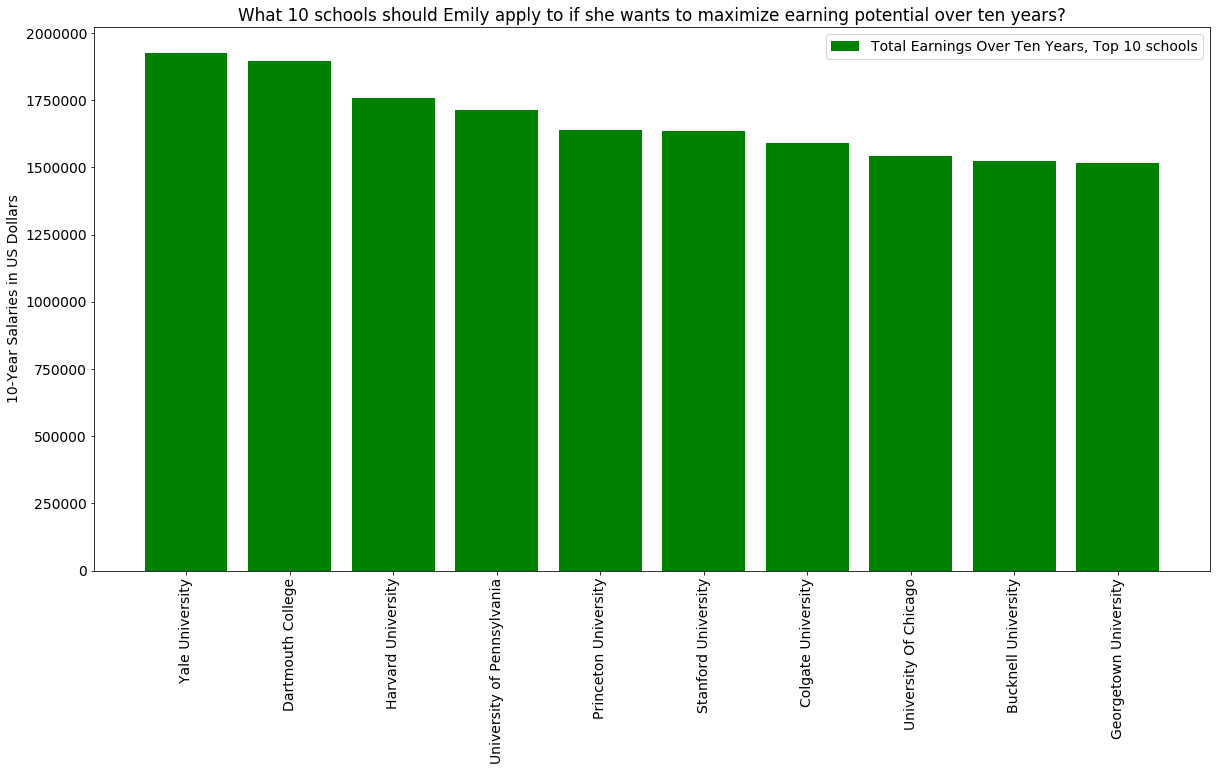

In [167]:
# Add the series data to a new column and then sort it by total income over 10 years. Sort descending and update.
schools['ten_yr_salary_sum'] = schools.apply(sum_ten_year_salary, axis=1)
schools = schools.sort_values(by=['ten_yr_salary_sum'], ascending=False)

# Now I'll make a subset of the data called 'best_schools' (10 top schools).
best_schools = schools.nlargest(10, 'ten_yr_salary_sum')

# Let's see the top 10 schools in a bar graph.
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})
x = best_schools.school_name
y = best_schools.ten_yr_salary_sum

labels = best_schools.school_name

plt.bar(x,y, color='g', label = 'Total Earnings Over Ten Years, Top 10 schools')

plt.xticks(x, labels, rotation=90) 
plt.ylabel('10-Year Salaries in US Dollars')
plt.title('What 10 schools should Emily apply to if she wants to maximize earning potential over ten years?')
plt.legend()
plt.show()


### Let's see what her results will be if she never makes it past the 50th percentile.

The worst high achievers earned 518000.0 more than the best "mediocre" earners. 
That's enough to own a nice new house free and clear after only ten years!


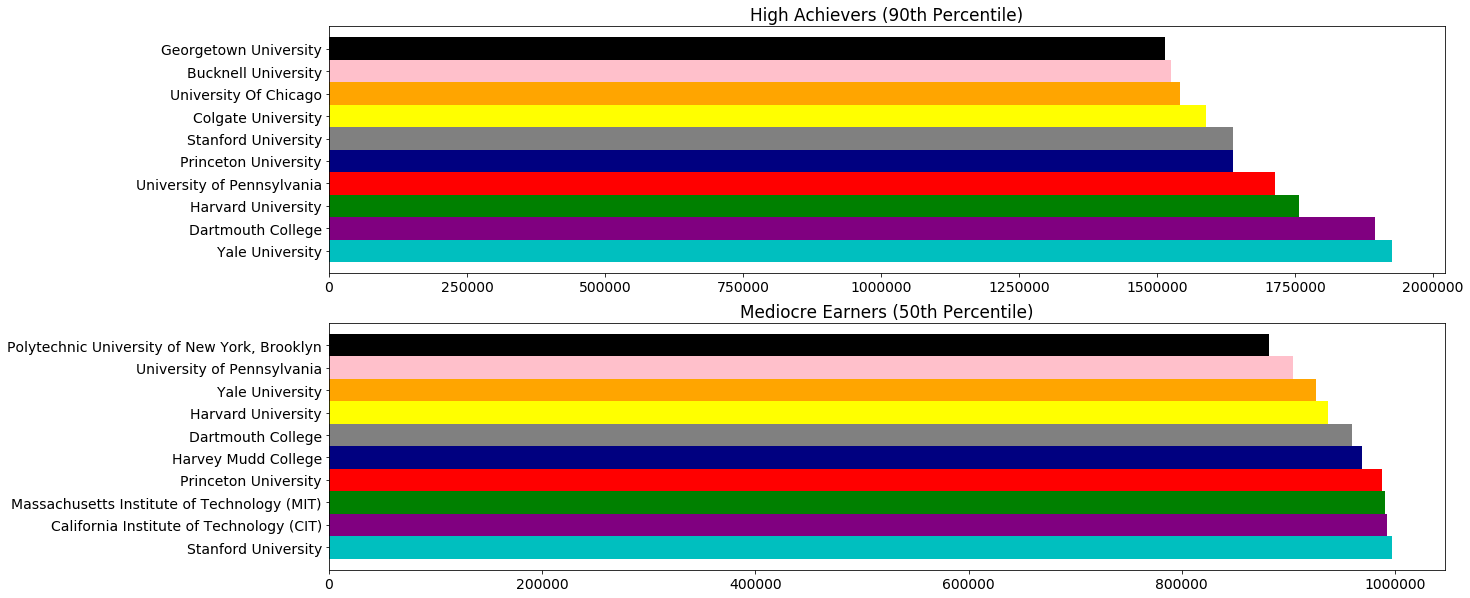

In [168]:
# Make a new variable assigned a separate dataframe that I'll add a new column to.
schools_median = region

# Make a series to simulate steady salary increase over 10 years, adding all the salaries together. 
def sum_ten_year_salary_median(row):
    return 5 * (row['start_median_salary'] + row['mid_car_med_sal'])

# Add the series data to a new column and then sort it by total income over 10 years. Sort descending and update.
schools_median['ten_yr_salary_sum'] = schools_median.apply(sum_ten_year_salary_median, axis=1)
schools_median = schools_median.sort_values(by=['ten_yr_salary_sum'], ascending=False)

# Now I'll make a subset of the data called 'best_schools_worst_case' (10 top schools by 10 year median salary sums).
best_schools_median = schools_median.nlargest(10, 'ten_yr_salary_sum')

f, (ax1, ax2) = plt.subplots(2, 1)

ind1 = best_schools.school_name
ind2 = best_schools_median.school_name
width = 1

a = best_schools.ten_yr_salary_sum
b = best_schools_median.ten_yr_salary_sum

colors = ['c', 'purple', 'g', 'red', 'navy', 'grey', 'yellow', 'orange', 'pink', 'black']

ax1.barh(ind1, a, width, color=colors)
ax2.barh(ind2, b, width, color=colors)

ax1.set_title('High Achievers (90th Percentile)')
ax2.set_title('Mediocre Earners (50th Percentile)')

plt.show()
# If being 90th percent comes from hard work, it's worth it to push yourself to be at the top. 
print('The worst high achievers earned', best_schools.ten_yr_salary_sum.min() - best_schools_median.ten_yr_salary_sum.max(), 'more than the best "mediocre" earners. ')
print('That\'s enough to own a nice new house free and clear after only ten years!')

### #2. What if she isn't admitted to the  top 10 schools? What 10 other schools should she apply to?

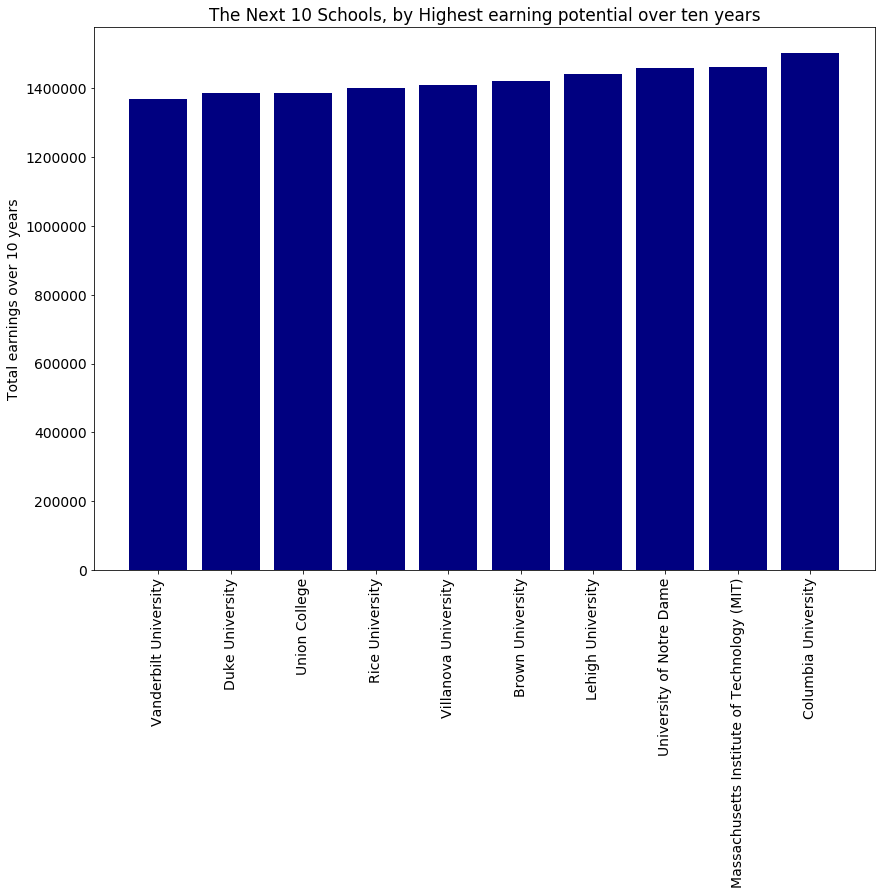

In [169]:
# I'll make a new dataframe called 'second_best', excluding the top 10 and selecting the next 10.
second_best = schools.nlargest(20, 'ten_yr_salary_sum').iloc[10:21]
second_best = second_best.sort_values(by=['ten_yr_salary_sum'], ascending=True)

plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.rcParams.update({'font.size': 14})

y = second_best.ten_yr_salary_sum
x = second_best.school_name

plt.bar(x, y, color='navy')
plt.ylabel("Total earnings over 10 years")
plt.title("The Next 10 Schools, by Highest earning potential over ten years")
plt.xticks(rotation=90)
plt.show();

### Let's say that Emily decides that she wants to study closer to home...

In [170]:
# After looking at the entire region dataset, I decide to find the best schools in the California and Western 
# regions.

''

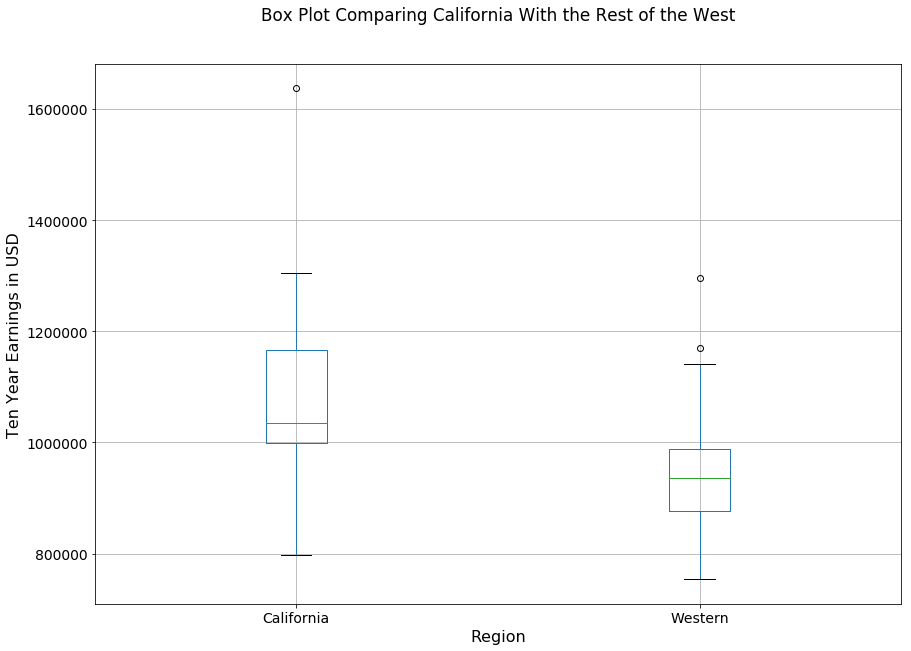

In [171]:
region_subset = schools[(schools.region == 'California') | (schools.region == 'Western')]
region_subset.boxplot(column = 'ten_yr_salary_sum', by = 'region' )
plt.xticks(rotation=0)
plt.title('');
plt.suptitle('Box Plot Comparing California With the Rest of the West');
plt.xlabel('Region', fontsize = '16')
plt.ylabel('Ten Year Earnings in USD', fontsize = '16')
;

## Obviously, Stanford is the outlier here, and is my number one pick. It's so far ahead of number two (UCLA Berkeley) that after 10 years, Emily could have enough saved to pay for most of a house in Oregon. Compared to No. 9, the U of O, where my wife graduated, the Stanford advantage gives her enough to buy a home and own a Tesla, free and clear.

In [172]:
region_subset.sort_values(by=['ten_yr_salary_sum'], ascending=False)

,school_name,region,start_median_salary,mid_car_med_sal,mid_p10,mid_p25,mid_p75,mid_p90,ten_yr_salary_sum
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,1637000.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,1304500.0
28,Colorado School of Mines,Western,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0,1295500.0
9,University of Southern California (USC),California,54800.0,99600.0,49700.0,73800.0,140000.0,201000.0,1279000.0
10,"University of California, Davis",California,52300.0,99600.0,52000.0,71600.0,135000.0,202000.0,1271500.0
6,University of California at Los Angeles (UCLA),California,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0,1228000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,1176000.0
29,University of Colorado - Boulder (UCB),Western,47100.0,97600.0,51600.0,69000.0,128000.0,187000.0,1170500.0
51,University of Oregon,Western,42200.0,78400.0,38100.0,56200.0,117000.0,186000.0,1141000.0
7,"University of California, San Diego (UCSD)",California,51100.0,101000.0,51700.0,75400.0,131000.0,177000.0,1140500.0


### #3. The major dataframe doesn't have any information on which school the survey respondent attended, but it does give us a general idea of which majors pay the most. Emily isn't set on biomedical engineering or prosthetic design and engineering, but she definitely wants to work with people instead of alone. She wants to help people with their health and she wants to make a lot of money. What should she major in? 

In [173]:
# Let's look at all the majors and pick all the ones that seem like they might meet our requirements.
major.major.unique()

array(['Accounting', 'Aerospace Engineering', 'Agriculture',
       'Anthropology', 'Architecture', 'Art History', 'Biology',
       'Business Management', 'Chemical Engineering', 'Chemistry',
       'Civil Engineering', 'Communications', 'Computer Engineering',
       'Computer Science', 'Construction', 'Criminal Justice', 'Drama',
       'Economics', 'Education', 'Electrical Engineering', 'English',
       'Film', 'Finance', 'Forestry', 'Geography', 'Geology',
       'Graphic Design', 'Health Care Administration', 'History',
       'Hospitality & Tourism', 'Industrial Engineering',
       'Information Technology (IT)', 'Interior Design',
       'International Relations', 'Journalism',
       'Management Information Systems (MIS)', 'Marketing', 'Math',
       'Mechanical Engineering', 'Music', 'Nursing', 'Nutrition',
       'Philosophy', 'Physician Assistant', 'Physics',
       'Political Science', 'Psychology', 'Religion', 'Sociology',
       'Spanish'], dtype=object)

''

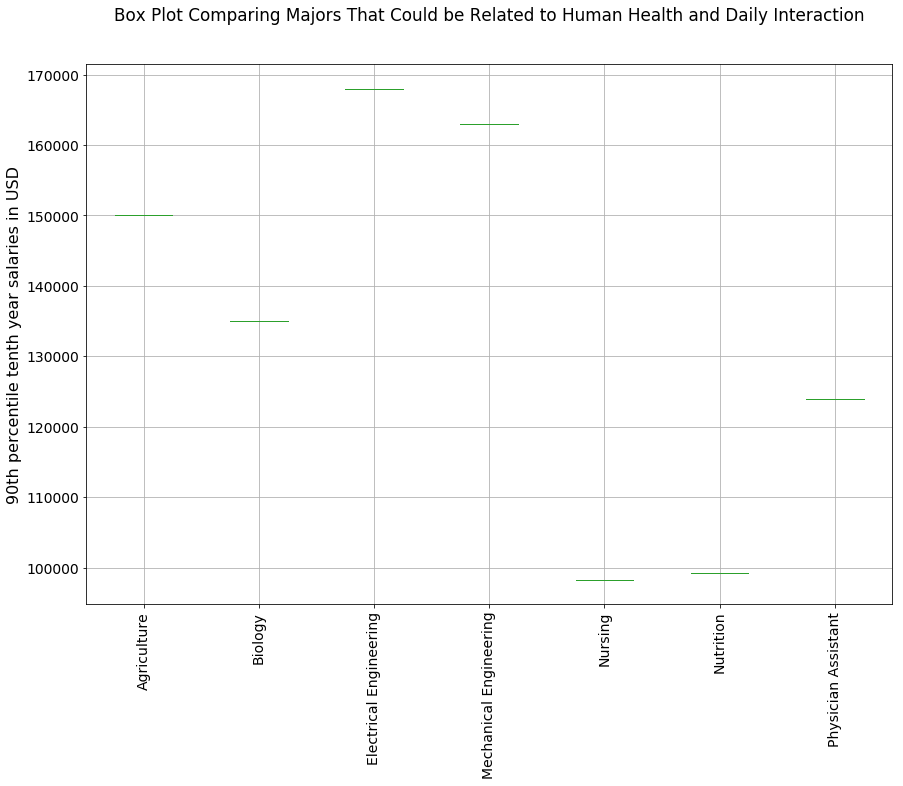

In [174]:
# Let's make a major subset. We are going to include electrical engineering and mechanical engineering since they 
# are related to prosthetics. It's unfortunate that biomedical engineering is not in the dataset.
major_subset = major[(major.major == 'Agriculture') | (major.major == 'Biology') |(major.major == 'Electrical Engineering') |
(major.major == 'Nursing') | (major.major == 'Mechanical Engineering') | (major.major == 'Nutrition') | (major.major == 'Physician Assistant')]
major_subset.boxplot(column = 'mid_p90', by = 'major' )
plt.xticks(rotation=90)
plt.title('');
plt.suptitle('Box Plot Comparing Majors That Could be Related to Human Health and Daily Interaction');
plt.xlabel('', fontsize = '16')
plt.ylabel('90th percentile tenth year salaries in USD', fontsize = '16')
;

In [175]:
# Let's drop the two lowest paying majors from this list. Then let's look at the dataframe.
people_health = major[(major.major == 'Agriculture') | (major.major == 'Biology') |(major.major == 'Electrical Engineering') |
(major.major == 'Nursing') | (major.major == 'Mechanical Engineering') | (major.major == 'Nutrition') | (major.major == 'Physician Assistant')]
people_health

,major,start_median_salary,mid_car_med_sal,percent_change_to_mid,mid_p10,mid_p25,mid_p75,mid_p90
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
6,Biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
41,Nutrition,39900.0,55300.0,38.6,33900.0,44500.0,70500.0,99200.0
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0


/Users/ghenton/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


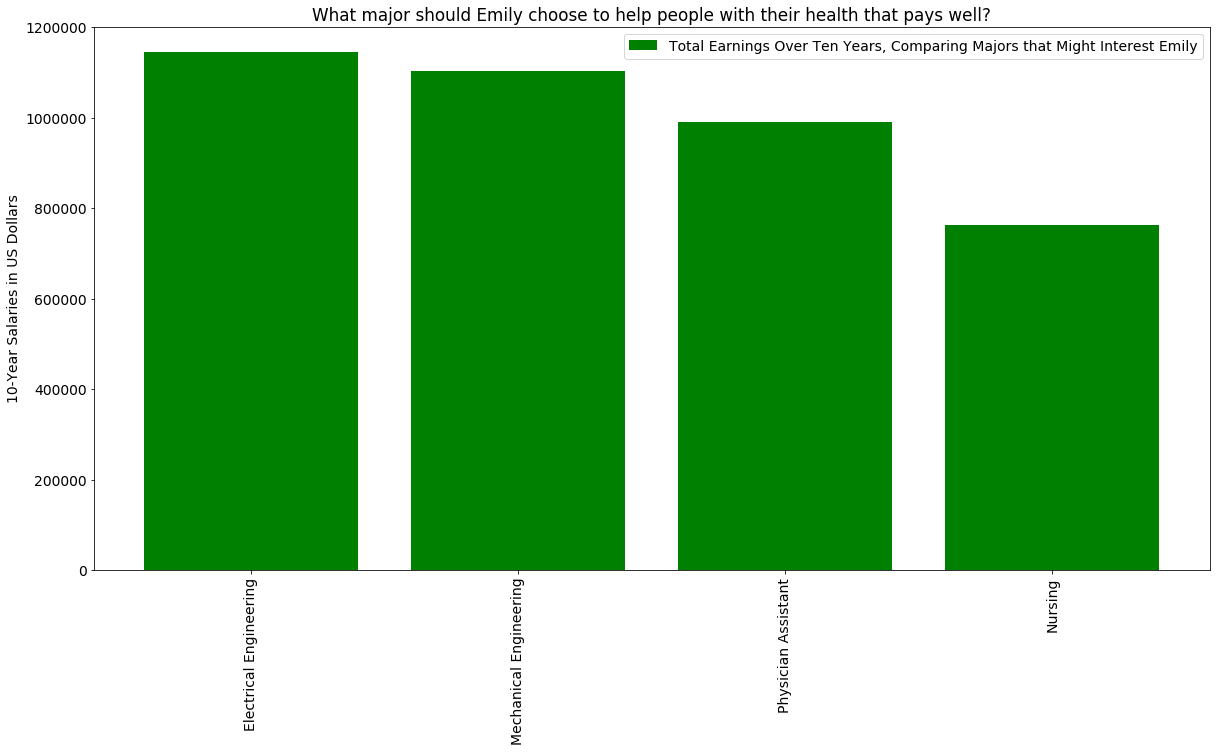

In [176]:
# Emily wants to make at least $50k starting out, so Agriculture, Biology, and Nutrition are out. 
# Time to visualize her total earnings over 10 years for the remaining majors. 

people_health = major[(major.major == 'Electrical Engineering') | (major.major == 'Nursing') | 
(major.major == 'Mechanical Engineering') | (major.major == 'Physician Assistant')]
people_health['ten_yr_salary_sum'] = people_health.apply(sum_ten_year_salary, axis=1)
people_health = people_health.sort_values(by=['ten_yr_salary_sum'], ascending=False)

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})
x = people_health.major
y = people_health.ten_yr_salary_sum

labels = people_health.major

plt.bar(x,y, color='g', label = 'Total Earnings Over Ten Years, Comparing Majors that Might Interest Emily')

plt.xticks(x, labels, rotation=90) 
plt.ylabel('10-Year Salaries in US Dollars')
plt.title('What major should Emily choose to help people with their health that pays well?')
plt.legend()
plt.show()

### What if Emily is just curious about how much people who go to college earn starting out, on average, compared to 10 years after starting work? How do the averages compare to her goal of starting at 60k?

Average salary 50th percentile mid-career:  83934.375
Median salary 50th percentile mid-career:  82700.0
Average starting 50th percentile salary:  46253.4375
Median of the 50th percentile starting salaries:  45100.0
The school with the highest median starting salary is:  California Institute of Technology (CIT) , 75500.0


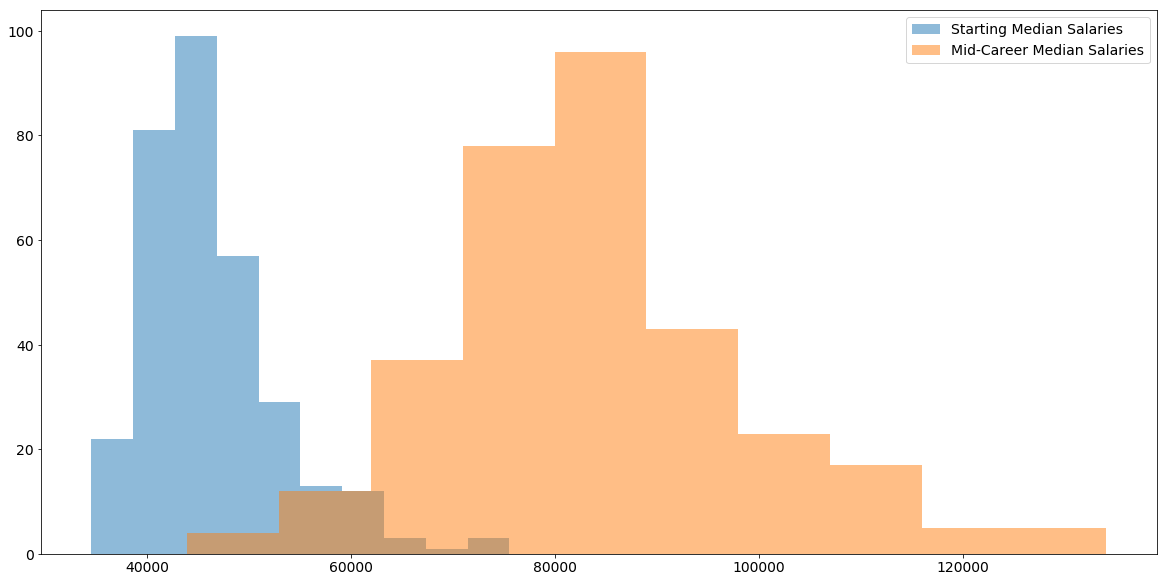

In [177]:
# If she only does better than 50% of her peers, she will earn about $45k in her first year and $83k in her 
# 10th year. If her No. 1 goal is to earn the most in her first year, she should see if there is a biomedical
# engineering major at California Institute of Technology.

print('Average salary 50th percentile mid-career: ', schools.mid_car_med_sal.mean())
print('Median salary 50th percentile mid-career: ', schools.mid_car_med_sal.median())
print('Average starting 50th percentile salary: ', schools.start_median_salary.mean())
print('Median of the 50th percentile starting salaries: ', schools.start_median_salary.median())
print('The school with the highest median starting salary is: ', region.loc[1].school_name, ",", region.loc[1].start_median_salary)

start = schools.start_median_salary
mid_career = schools.mid_car_med_sal
plt.hist(start, alpha=0.5, label='Starting Median Salaries')
plt.hist(mid_career, alpha=0.5, label='Mid-Career Median Salaries')
plt.legend(loc='upper right')
plt.show()


## Proposed Further Research:
### To make this dataset more useful, I would combine data on region, school type, and major for all 320 schools. It would be able to answer a question like "If I graduated from a certain school with a certain major and worked in a certain region in a certain type of job, I could expect my salary to be within what range?" It would include community colleges and trade schools such as Thinkful and Alchemy Code Lab. Also, it would look at schools that produced the most successful entrepreneurs (whether or not they graduated) and show how much the entrepreneurs were worth 10 years after graduating or founding their first startup. This data would show both the risks and rewards that come with being an entrepreneur. Entrepreneurs would also need to show day jobs/income sources.  Finally, the data would show positions that are currently unfilled and the salaries being offered for these positions, mapping the majors and skillsets required to fill these positions. This research would all be conducted over the telephone and/or in person.
